<a href="https://colab.research.google.com/github/EdwarRangel/Parcial/blob/main/Parte_practica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFORME ESTADÍSTICO:**

Correlación entre Resultados Académicos y Nivel Socioeconómico: Un Enfoque de Regresión en el ICFES

AUTORES:

EDWAR RANGEL

VALENTINA MORENO

MARLON PEÑA

ASIGNATURA: ESTADÍSTICA 2

AÑO: 2024 - 2

# **Introducción**
El presente trabajo tiene como objetivo analizar la relación entre los puntajes obtenidos en diversas áreas del examen ICFES Saber 11 y el índice socioeconómico individual de los estudiantes. Utilizando un conjunto de datos provenientes de los resultados del examen del año 2023, se desarrollan diferentes modelos de regresión lineal para estimar la variable dependiente, el Índice Socioeconómico Individual (ESTU_INSE_INDIVIDUAL), a partir de las calificaciones en áreas clave como Lectura Crítica, Matemáticas, Ciencias Naturales, Sociales y Ciudadanas, y Inglés.
El análisis incluye la implementación de técnicas de regresión lineal simple y múltiple para modelar la relación entre las variables, además de un análisis de correlación empleando los coeficientes de Pearson, Spearman y Kendall para evaluar la fuerza y dirección de las relaciones entre los puntajes de las pruebas y el índice socioeconómico. Asimismo, se utilizan herramientas avanzadas como redes neuronales artificiales para comparar el desempeño de los modelos predictivos.
Este trabajo no solo busca generar predicciones precisas, sino también explorar la influencia de cada componente del examen en el nivel socioeconómico, lo que podría proporcionar una visión más profunda sobre la equidad y el acceso a oportunidades educativas en función del desempeño académico.

# **CÓDIGO Y SUS RESULTADOS**

In [2]:
import pandas as pd
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPRegressor
from scipy.stats import spearmanr, kendalltau
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving SB11_20231.TXT to SB11_20231.TXT


In [4]:

datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']), delimiter='¬', )


<ipython-input-4-57075c608453>:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']), delimiter='¬', )


In [5]:
print(datos_icfes.columns)

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_DEPTO_RESIDE',
       'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO',
       'ESTU_PRESENTACIONSABADO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_

In [6]:
icfes_sin_nan = datos_icfes[(~datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) &
(~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) &
(~datos_icfes['PUNT_MATEMATICAS'].isna()) &
(~datos_icfes['PUNT_C_NATURALES'].isna()) &
(~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) &
(~datos_icfes['PUNT_INGLES'].isna())]


In [7]:
icfes_sin_nan = icfes_sin_nan[(icfes_sin_nan['PUNT_INGLES'] < 99) & (icfes_sin_nan['ESTU_INSE_INDIVIDUAL'] < 99) & (icfes_sin_nan['PUNT_LECTURA_CRITICA'] < 99) & (icfes_sin_nan['PUNT_MATEMATICAS'] < 99) & (icfes_sin_nan['PUNT_C_NATURALES'] < 99) & (icfes_sin_nan['PUNT_SOCIALES_CIUDADANAS'] < 99)]

In [8]:
tabla_regresion = icfes_sin_nan[['ESTU_INSE_INDIVIDUAL','PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES']]
tabla_regresion.head(4)


,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3,41.863163,45,41,41,27,58.0
4,51.223795,53,55,41,56,69.0
5,57.690401,63,38,60,59,45.0
6,39.984838,69,60,59,51,50.0


<Axes: >

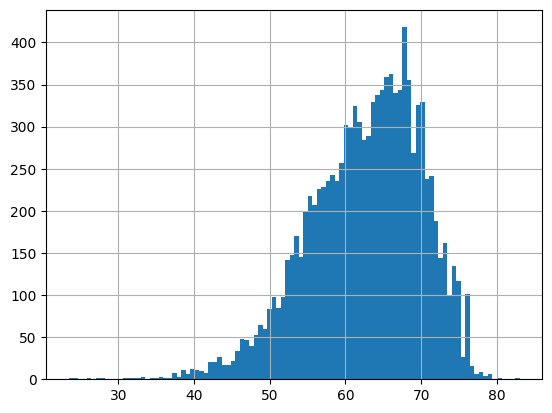

In [9]:
tabla_regresion['ESTU_INSE_INDIVIDUAL']. hist(bins=100)

<Axes: >

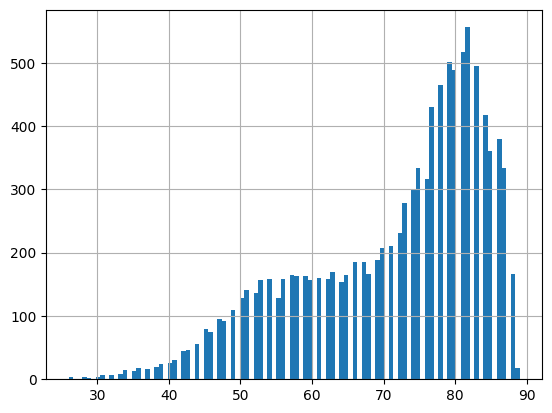

In [10]:
tabla_regresion['PUNT_INGLES']. hist(bins=100)

<Axes: >

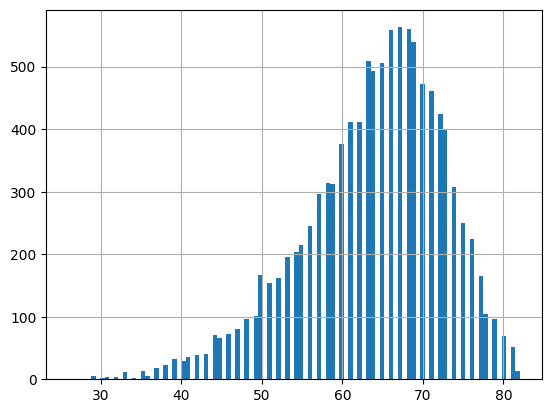

In [11]:
tabla_regresion['PUNT_LECTURA_CRITICA']. hist(bins=100)

<Axes: >

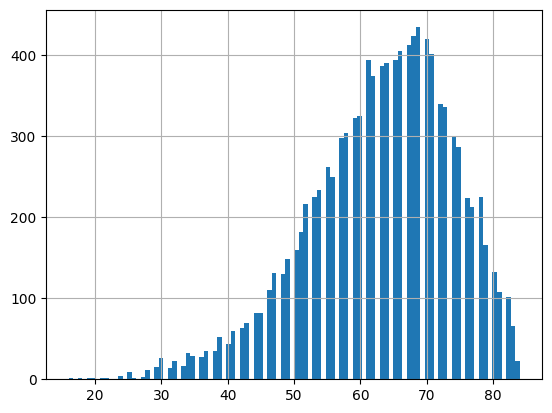

In [12]:
tabla_regresion['PUNT_MATEMATICAS']. hist(bins=100)

<Axes: >

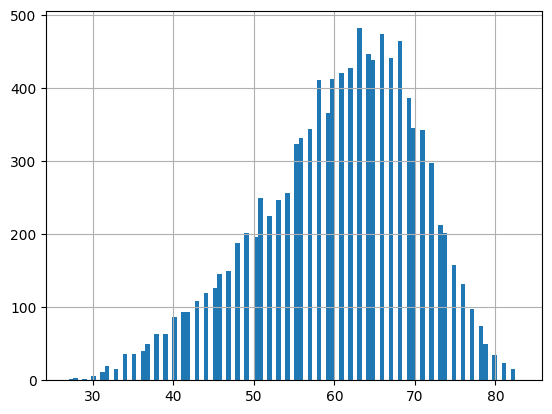

In [13]:
tabla_regresion['PUNT_C_NATURALES']. hist(bins=100)

<Axes: >

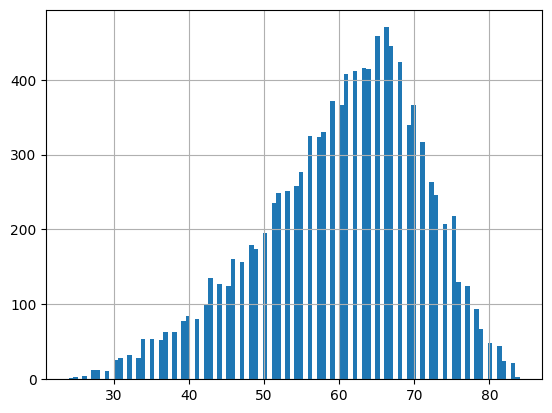

In [14]:
tabla_regresion['PUNT_SOCIALES_CIUDADANAS']. hist(bins=100)

In [15]:
x= np.array(icfes_sin_nan[['PUNT_INGLES']]).reshape(-1,1)
y= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
modelo_lineal = LinearRegression()
regresion = modelo_lineal.fit(x, y)
Pred_lineal = regresion.predict(x)

In [16]:
x0= np.array(icfes_sin_nan[['PUNT_INGLES']]).reshape(-1,1)
y0= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainx0, testx0, trainy0, testy0 = train_test_split(x0, y0, test_size = 0.2)
modelo_lineal0 = LinearRegression()
regresion0 = modelo_lineal0.fit(trainx0, trainy0)
Pred_lineal0 = regresion0.predict(testx0)

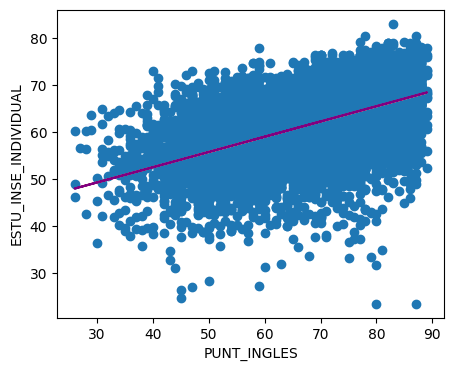

In [17]:
plt.figure(figsize=(5, 4))
plt.scatter(icfes_sin_nan['PUNT_INGLES'] , icfes_sin_nan['ESTU_INSE_INDIVIDUAL'] )
plt.plot(testx0, Pred_lineal0, color='salmon')
plt.plot(x, Pred_lineal, color='purple')
plt.xlabel('PUNT_INGLES')
plt.ylabel('ESTU_INSE_INDIVIDUAL')
plt.show()

En un primer diagrama de dispersión comparamos las variables PUNT_INGLES con ESTU_INSE_INDIVIDUAL, la cual nos indica el Índice nivel socioeconómico del evaluado, de ahí se logra observar que algunos estudiantes con mayor nivel socioeconómico obtuvieron un mejor puntaje en las pruebas de inglés. Sin embargo, esto no implica que exista dependencia ni correlación entre el puntaje en inglés y el nivel socioeconómico del estudiante pues se puede ver una nube de puntos sin un patrón especifico.

In [18]:
x11= np.array(icfes_sin_nan[['PUNT_LECTURA_CRITICA']]).reshape(-1,1)
y11= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
modelo_lineal11 = LinearRegression()
regresion11 = modelo_lineal11.fit(x11, y11)
Pred_lineal11 = regresion11.predict(x11)

In [19]:
x1= np.array(icfes_sin_nan[['PUNT_LECTURA_CRITICA']]).reshape(-1,1)
y1= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainx1, testx1, trainy1, testy1 = train_test_split(x1, y1, test_size = 0.2)
modelo_lineal1 = LinearRegression()
regresion1 = modelo_lineal1.fit(trainx1, trainy1)
Pred_lineal1 = regresion1.predict(testx1)


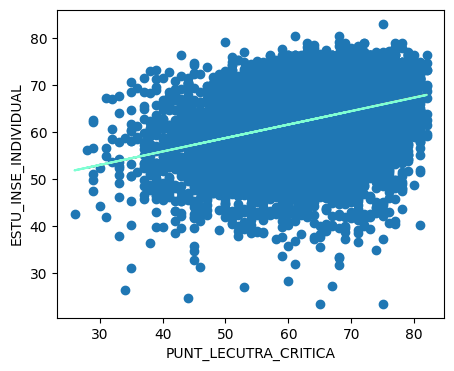

In [20]:
plt.figure(figsize=(5, 4))
plt.scatter(icfes_sin_nan['PUNT_LECTURA_CRITICA'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
plt.plot(testx1, Pred_lineal1, color='gray')
plt.plot(x11, Pred_lineal11, color='aquamarine')
plt.xlabel('PUNT_LECUTRA_CRITICA')
plt.ylabel('ESTU_INSE_INDIVIDUAL')
plt.show()

En un segundo diagrama de dispersión comparamos las variables PUNT_LECTURA_CRITICA con ESTU_INSE_INDIVIDUAL, la cual nos indica el Índice nivel socioeconómico del evaluado, de ahí se logra observar que algunos estudiantes con mayor nivel socioeconómico obtuvieron un mejor puntaje en las pruebas de lectura critica. Sin embargo, esto no implica que exista dependencia ni correlación entre el puntaje en lectura crítica y el nivel socioeconómico del estudiante pues se puede ver una nube de puntos sin un patrón especifico.

In [21]:
x22= np.array(icfes_sin_nan[['PUNT_MATEMATICAS']]).reshape(-1,1)
y22= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
modelo_lineal22 = LinearRegression()
regresion22 = modelo_lineal22.fit(x22, y22)
Pred_lineal22 = regresion22.predict(x22)

In [22]:
x2= np.array(icfes_sin_nan[['PUNT_MATEMATICAS']]).reshape(-1,1)
y2= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainx2, testx2, trainy2, testy2 = train_test_split(x2, y2, test_size = 0.2)
modelo_lineal2 = LinearRegression()
regresion2 = modelo_lineal2.fit(trainx2, trainy2)
Pred_lineal2 = regresion2.predict(testx2)

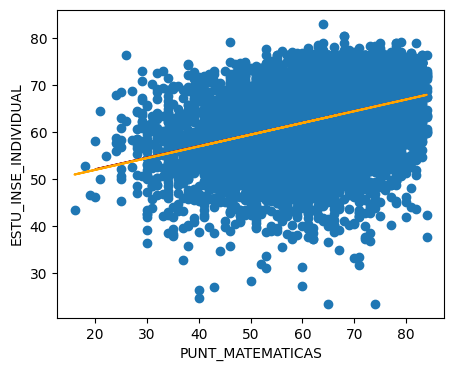

In [23]:
plt.figure(figsize=(5, 4))
plt.scatter(icfes_sin_nan['PUNT_MATEMATICAS'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
plt.plot(testx2, Pred_lineal2, color='brown')
plt.plot(x22, Pred_lineal22, color='orange')
plt.xlabel('PUNT_MATEMATICAS')
plt.ylabel('ESTU_INSE_INDIVIDUAL')
plt.show()

En un tercer diagrama de dispersión comparamos las variables PUNT_MATEMATICAS con ESTU_INSE_INDIVIDUAL, la cual nos indica el Índice nivel socioeconómico del evaluado, de ahí se logra observar que algunos estudiantes con mayor nivel socioeconómico obtuvieron un mejor puntaje en las pruebas de matemáticas. Sin embargo, esto no implica que exista dependencia ni correlación entre el puntaje en matemáticas y el nivel socioeconómico del estudiante pues se puede ver una nube de puntos sin un patrón especifico.

In [24]:
x33= np.array(icfes_sin_nan[['PUNT_C_NATURALES']]).reshape(-1,1)
y33= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
modelo_lineal33 = LinearRegression()
regresion33 = modelo_lineal33.fit(x33, y33)
Pred_lineal33 = regresion33.predict(x33)

In [25]:
x3= np.array(icfes_sin_nan[['PUNT_C_NATURALES']]).reshape(-1,1)
y3= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainx3, testx3, trainy3, testy3 = train_test_split(x3, y3, test_size = 0.3)
modelo_lineal3 = LinearRegression()
regresion3 = modelo_lineal3.fit(trainx3, trainy3)
Pred_lineal3 = regresion3.predict(testx3)

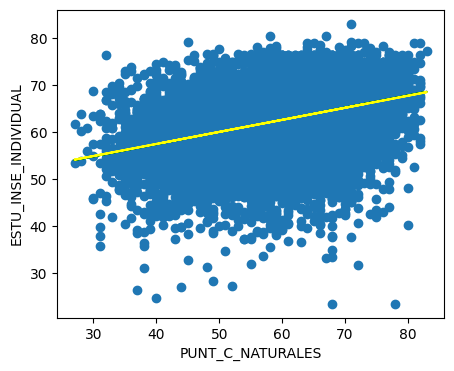

In [26]:
plt.figure(figsize=(5, 4))
plt.scatter(icfes_sin_nan['PUNT_C_NATURALES'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
plt.plot(testx3, Pred_lineal3, color='green')
plt.plot(x33, Pred_lineal33, color='yellow')
plt.xlabel('PUNT_C_NATURALES')
plt.ylabel('ESTU_INSE_INDIVIDUAL')
plt.show()

En un cuarto diagrama de dispersión comparamos las variables PUNT_C_NATURALES con ESTU_INSE_INDIVIDUAL, la cual nos indica el Índice nivel socioeconómico del evaluado, de ahí se logra observar que algunos estudiantes con mayor nivel socioeconómico obtuvieron un mejor puntaje en las pruebas de ciencias naturales. Sin embargo, esto no implica que exista dependencia ni correlación entre el puntaje en ciencias naturales y el nivel socioeconómico del estudiante pues se puede ver una nube de puntos sin un patrón especifico.

In [27]:
x44= np.array(icfes_sin_nan[['PUNT_SOCIALES_CIUDADANAS']]).reshape(-1,1)
y44= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
modelo_lineal44 = LinearRegression()
regresion44 = modelo_lineal11.fit(x44, y44)
Pred_lineal44 = regresion44.predict(x44)

In [28]:
x4= np.array(icfes_sin_nan[['PUNT_SOCIALES_CIUDADANAS']]).reshape(-1,1)
y4= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainx4, testx4, trainy4, testy4 = train_test_split(x4, y4, test_size = 0.4)
modelo_lineal4 = LinearRegression()
regresion4 = modelo_lineal4.fit(trainx4, trainy4)
Pred_lineal4 = regresion4.predict(testx4)

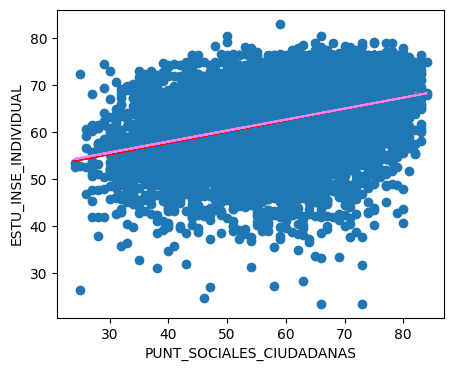

In [29]:
plt.figure(figsize=(5, 4))
plt.scatter(icfes_sin_nan['PUNT_SOCIALES_CIUDADANAS'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
plt.plot(testx4, Pred_lineal4, color='red')
plt.plot(x44, Pred_lineal44, color='violet')
plt.xlabel('PUNT_SOCIALES_CIUDADANAS')
plt.ylabel('ESTU_INSE_INDIVIDUAL')
plt.show()

En un quinto diagrama de dispersión comparamos las variables PUNT_SOCIALES_CIUDADANAS con ESTU_INSE_INDIVIDUAL, la cual nos indica el Índice nivel socioeconómico del evaluado, de ahí se logra observar que algunos estudiantes con mayor nivel socioeconómico obtuvieron un mejor puntaje en las pruebas de sociales y ciudadanas. Sin embargo, esto no implica que exista dependencia ni correlación entre el puntaje en sociales y ciudadanas y el nivel socioeconómico del estudiante pues se puede ver una nube de puntos sin un patrón especifico.

In [96]:
X = tabla_regresion.drop("ESTU_INSE_INDIVIDUAL", axis = 1)
Y = tabla_regresion["ESTU_INSE_INDIVIDUAL"]
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state = 0)
trainX.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
8008,61,59,51,52,71.0
8252,42,42,56,45,28.0
3787,66,81,61,62,67.0
6217,59,66,48,38,67.0


In [97]:
modelo_lineal = LinearRegression()
regresion = modelo_lineal.fit(trainX, trainY)
pred_lineal = regresion.predict(testX)

In [98]:
r2_lineal = regresion.score(testX, testY)
r2_lineal

0.27967527754225285

In [99]:
X= icfes_sin_nan[['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES']]
Y= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2)
trainX.head(5)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
7909,61,63,56,68,63.0
11253,69,73,62,66,78.0
11504,49,54,53,33,49.0
9303,66,68,69,76,81.0
3614,69,67,74,64,81.0


In [100]:
modelo_lineal = LinearRegression()
regresion = modelo_lineal.fit(trainX, trainY)
Pred_lineal = regresion.predict(testX)

In [101]:
r2_lineal= regresion.score(testX, testY)
r2_lineal

0.300965399923258

In [191]:
X1= icfes_sin_nan[['PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES']]
Y1= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainX1, testX1, trainY1, testY1 = train_test_split(X1, Y1, test_size = 0.2)
trainX1.head(5)

,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3971,66,72,71,73.0
6653,78,78,82,84.0
5780,67,62,67,73.0
1259,69,71,76,86.0
8113,76,71,80,78.0


In [192]:
modelo_lineal1 = LinearRegression()
regresion1 = modelo_lineal1.fit(trainX1, trainY1)
Pred_lineal1 = regresion1.predict(testX1)
r2_lineal1= regresion1.score(testX1, testY1)
r2_lineal1

0.2887074573263677

In [167]:
X2= icfes_sin_nan[['PUNT_LECTURA_CRITICA', 'PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES']]
Y2= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainX2, testX2, trainY2, testY2 = train_test_split(X2, Y2, test_size = 0.2)
trainX2.head(5)

,PUNT_LECTURA_CRITICA,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
7731,47,47,35,39.0
11753,71,57,64,61.0
1536,51,55,56,61.0
4026,79,62,77,86.0
10854,67,65,68,80.0


In [168]:
modelo_lineal2 = LinearRegression()
regresion2 = modelo_lineal2.fit(trainX2, trainY2)
Pred_lineal2 = regresion2.predict(testX2)
r2_lineal2= regresion2.score(testX2, testY2)
r2_lineal2

0.3103964982369276

In [195]:
X3= icfes_sin_nan[['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES']]
Y3= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainX3, testX3, trainY3, testY3 = train_test_split(X3, Y3, test_size = 0.2)
trainX3.head(5)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
11532,68,71,80,80.0
10042,45,60,51,59.0
7921,51,67,45,70.0
9112,75,66,77,66.0
9057,58,62,56,72.0


In [196]:
modelo_lineal3 = LinearRegression()
regresion3 = modelo_lineal3.fit(trainX3, trainY3)
Pred_lineal3 = regresion3.predict(testX3)
r3_lineal3= regresion3.score(testX3, testY3)
r3_lineal3

0.29251097709144613

In [197]:
X4= icfes_sin_nan[['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_INGLES']]
Y4= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainX4, testX4, trainY4, testY4 = train_test_split(X4, Y4, test_size = 0.2)
trainX4.head(5)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_INGLES
2886,70,70,58,79.0
4921,52,57,60,65.0
7689,69,78,78,84.0
3783,49,32,40,48.0
10318,72,67,64,84.0


In [198]:
modelo_lineal4 = LinearRegression()
regresion4 = modelo_lineal4.fit(trainX4, trainY4)
Pred_lineal4 = regresion4.predict(testX4)
r4_lineal4= regresion4.score(testX4, testY4)
r4_lineal4

0.3046049585356765

In [165]:
X5= icfes_sin_nan[['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS']]
Y5= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainX5, testX5, trainY5, testY5 = train_test_split(X5, Y5, test_size = 0.2)
trainX5.head(5)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS
10911,71,76,82,68
402,70,65,48,52
213,70,71,68,73
7474,64,74,69,64
2878,63,71,64,73


In [166]:
modelo_lineal5 = LinearRegression()
regresion5 = modelo_lineal5.fit(trainX5, trainY5)
Pred_lineal5 = regresion5.predict(testX5)
r5_lineal5= regresion5.score(testX5, testY5)
r5_lineal5

0.13892257472763925

A partir de la informacion anterior podemos deducir que las variables mas explicativas son ['PUNT_LECTURA_CRITICA' y 'PUNT_INGLES'] puesto que sus coefecientes son los mas lejanos al coeficiente con las 5 variables explicativas

In [199]:
X6= icfes_sin_nan[['PUNT_LECTURA_CRITICA','PUNT_INGLES']]
Y6= icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainX6, testX6, trainY6, testY6 = train_test_split(X6, Y6, test_size = 0.2)
trainX6.head(5)

,PUNT_LECTURA_CRITICA,PUNT_INGLES
1538,55,64.0
573,70,79.0
5947,66,79.0
7504,64,73.0
5679,70,85.0


In [171]:
modelo_lineal6 = LinearRegression()
regresion6 = modelo_lineal6.fit(trainX6, trainY6)
Pred_lineal6 = regresion6.predict(testX6)
r6_lineal6= regresion6.score(testX6, testY6)
r6_lineal6

0.13823281614679928

In [200]:
XY, Z = icfes_sin_nan[['PUNT_LECTURA_CRITICA', 'PUNT_INGLES' ]], icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
trainXY, testXY, trainZ, testZ = train_test_split(XY, Z, test_size = 0.2)
trainXY.head(5)

,PUNT_LECTURA_CRITICA,PUNT_INGLES
2921,62,55.0
995,73,69.0
5494,70,77.0
3951,57,78.0
6908,43,33.0


In [115]:
modelo1 = LinearRegression()
modelo1.fit(trainXY, trainZ)


LinearRegression()

In [116]:
modelo1.score(testXY, testZ)

0.317453837587645

In [117]:
array = modelo1.coef_
array

array([-0.02160121,  0.33163746])

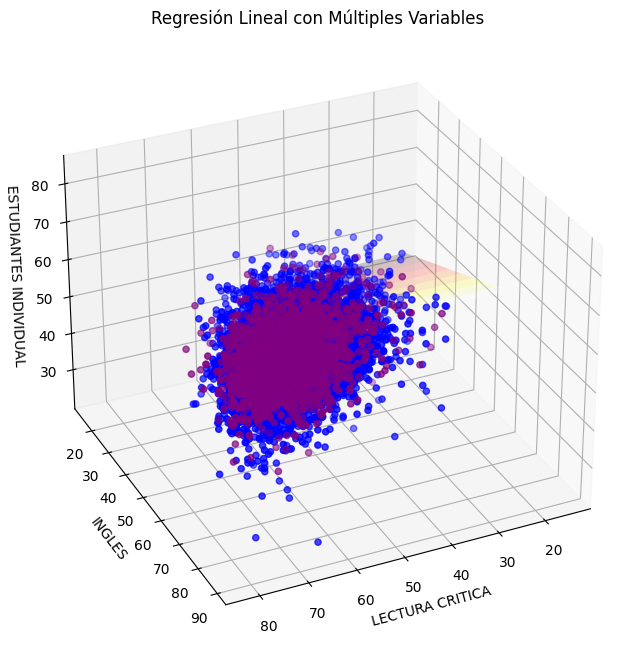

In [201]:
fig = plt.figure(figsize=((10,8)))
ax = fig.add_subplot(projection='3d')
xx, yy = np.meshgrid(np.linspace(15, 50, num=10), np.linspace(15, 65, num=10))
plano_reg = array[0]*xx + array[1]*yy + modelo1.intercept_

ax.plot_surface(xx, yy, plano_reg, alpha=0.2, cmap='hot')
ax.scatter(trainXY["PUNT_LECTURA_CRITICA"], trainXY["PUNT_INGLES"], trainZ, c='blue',s=20)
ax.scatter(testXY["PUNT_LECTURA_CRITICA"], testXY["PUNT_INGLES"], testZ, c='purple',s=20)
ax.view_init(elev=30., azim=65)

ax.set_xlabel('LECTURA CRITICA')
ax.set_ylabel('INGLES')
ax.set_zlabel('ESTUDIANTES INDIVIDUAL')
ax.set_title('Regresión Lineal con Múltiples Variables')
plt.show()

In [202]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(100,100,100,100, 100, 100),
max_iter = 500,
activation = 'relu',
solver = 'adam',
learning_rate = 'invscaling')
mlp_reg.fit(trainX, trainY)

MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100),
             learning_rate='invscaling', max_iter=500)

In [203]:
mlp_reg.score(testX, testY)

0.2881877087369098

In [176]:

X.head(5)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3,45,41,41,27,58.0
4,53,55,41,56,69.0
5,63,38,60,59,45.0
6,69,60,59,51,50.0
7,57,68,74,61,52.0


In [177]:
no_obs = np.array([[80, 60, 83, 73, 57]])
print('Se espera que el indice socioeconomico del estudiante', mlp_reg.predict(no_obs), 'bajo el perceptrón multicapa y ',
      modelo_lineal.predict(no_obs), " bajo el modelo de regresión lineal múltiple.")

Se espera que el indice socioeconomico del estudiante [65.73684766] bajo el perceptrón multicapa y  [56.81950791]  bajo el modelo de regresión lineal múltiple.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [208]:
pearson_corr = np.corrcoef(icfes_sin_nan['PUNT_INGLES'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])[0, 1]
pearman_corr, _ = spearmanr(icfes_sin_nan['PUNT_INGLES'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
kendall_corr, _ = kendalltau(icfes_sin_nan['PUNT_INGLES'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr}, {pearman_corr} y {kendall_corr}.")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.5542145241304997, 0.5643625792430149 y 0.3943616513896971.


De acuerdo con los coeficientes de correlación de Pearson, de Kendall y de Spearman se determina que el PUNT_INGLES y ESTU_INSE_INDIVIDUAL están moderadamente correlacionadas. Puesto que

Y depende moderadamente de X o X y Y están moderadamente correlacionadas si  0.4<|ρ(X,Y)|<0.6, 0.4<η(X,Y)|<0.6, 0.4<|κ(X,Y)|<0.6


In [210]:
pearson_corr = np.corrcoef(icfes_sin_nan['PUNT_MATEMATICAS'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])[0, 1]
pearman_corr, _ = spearmanr(icfes_sin_nan['PUNT_MATEMATICAS'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
kendall_corr, _ = kendalltau(icfes_sin_nan['PUNT_MATEMATICAS'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr}, {pearman_corr} y {kendall_corr}.")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.36486703987368574, 0.37499076591079844 y 0.25809825144385445.


De acuerdo con los coeficientes de correlación de Pearson, de Kendall y de Spearman se determina que el PUNT_MATEMATICAS y ESTU_INSE_INDIVIDUAL están  discretamente correlacionadas. Puesto que

Y depende discretamente de X o X y Y están discretamente correlacionadas si  0.2<|ρ(X,Y)|<0.4, 0.2<η(X,Y)|<0.4, 0.2<|κ(X,Y)|<0.4


In [211]:
pearson_corr = np.corrcoef(icfes_sin_nan['PUNT_C_NATURALES'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])[0, 1]
pearman_corr, _ = spearmanr(icfes_sin_nan['PUNT_C_NATURALES'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
kendall_corr, _ = kendalltau(icfes_sin_nan['PUNT_C_NATURALES'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr}, {pearman_corr} y {kendall_corr}.")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.3414338036064255, 0.3446900287413491 y 0.2366012796416435.


De acuerdo con los coeficientes de correlación de Pearson, de Kendall y de Spearman se determina que el PUNT_C_NATURALES y ESTU_INSE_INDIVIDUAL están discretamente correlacionadas. Puesto que

Y depende discretamente de X o X y Y están discretamente correlacionadas si  0.2<|ρ(X,Y)|<0.4, 0.2<η(X,Y)|<0.4, 0.2<|κ(X,Y)|<0.4


In [181]:
pearson_corr = np.corrcoef(icfes_sin_nan['PUNT_SOCIALES_CIUDADANAS'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])[0, 1]
pearman_corr, _ = spearmanr(icfes_sin_nan['PUNT_SOCIALES_CIUDADANAS'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
kendall_corr, _ = kendalltau(icfes_sin_nan['PUNT_SOCIALES_CIUDADANAS'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr}, {pearman_corr} y {kendall_corr}.")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.33887716148310604, 0.34184516915144963 y 0.23481554055974116.


De acuerdo con los coeficientes de correlación de Pearson, de Kendall y de Spearman se determina que el PUNT_SOCIALES_CIUDADANAS y ESTU_INSE_INDIVIDUAL están discretamente correlacionadas. Puesto que

Y depende discretamente de X o X y Y están discretamente correlacionadas si  0.2<|ρ(X,Y)|<0.4, 0.2<η(X,Y)|<0.4, 0.2<|κ(X,Y)|<0.4


In [182]:
pearson_corr = np.corrcoef(icfes_sin_nan['PUNT_LECTURA_CRITICA'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])[0, 1]
pearman_corr, _ = spearmanr(icfes_sin_nan['PUNT_LECTURA_CRITICA'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
kendall_corr, _ = kendalltau(icfes_sin_nan['PUNT_LECTURA_CRITICA'], icfes_sin_nan['ESTU_INSE_INDIVIDUAL'])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr}, {pearman_corr} y {kendall_corr}.")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.33859852378231725, 0.3374003237263829 y 0.23227379710032733.


De acuerdo con los coeficientes de correlación de Pearson, de Kendall y de Spearman se determina que el PUNT_LECTURA_CRITICA y ESTU_INSE_INDIVIDUAL están discretamente correlacionadas. Puesto que

Y depende discretamente de X o X y Y están discretamente correlacionadas si  0.2<|ρ(X,Y)|<0.4, 0.2<η(X,Y)|<0.4, 0.2<|κ(X,Y)|<0.4


In [183]:
icfes_connan =datos_icfes[(datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) &
(~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) &
(~datos_icfes['PUNT_MATEMATICAS'].isna()) &
(~datos_icfes['PUNT_C_NATURALES'].isna()) &
(~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) &
(~datos_icfes['PUNT_INGLES'].isna())]

In [184]:
X_no = icfes_connan[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS',
                     'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS',
                     'PUNT_INGLES']]
mlp_reg.predict(X_no)

array([57.23220947, 58.86314845, 54.80448115, 59.70145905, 61.86951197,
       55.87370631, 62.86792643, 56.8371402 , 68.14962062, 70.5490852 ,
       78.50929975, 67.7019699 , 67.92238451, 59.25064188, 67.3907403 ,
       59.45260517, 59.46665271, 63.56817254, 59.43588342, 69.85609479,
       66.73934902, 61.89113627, 56.86900184, 57.20782189, 58.84427428,
       58.63330806, 61.49192375, 63.68837835, 58.73042298, 61.10940319,
       68.03136373, 66.45488897, 62.93694775, 68.20488859, 59.15813237,
       68.23439457, 63.57177006, 57.33221418, 61.91909691, 61.32244258,
       68.06423998, 56.42671587, 65.55117688, 70.05726102, 66.59357031,
       63.44684073, 54.12239387, 56.5871021 , 57.20804745, 56.52361381,
       64.41822119, 66.95601214, 66.93959491, 54.19139226, 55.8826063 ,
       63.87088885, 70.44126802, 59.64608441, 63.41706546, 63.51509078,
       57.69812209, 68.62772422, 78.86681974, 66.5624759 , 68.47986733,
       62.74843259, 63.92439775, 57.35378951, 66.56059206, 57.89

In [185]:
X = icfes_sin_nan[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
y = icfes_sin_nan['ESTU_INSE_INDIVIDUAL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Error cuadrático medio - Modelo Lineal: {mse_linear}")
print(f"Error cuadrático medio - Bosque Aleatorio: {mse_rf}")


Error cuadrático medio - Modelo Lineal: 40.6284046447652
Error cuadrático medio - Bosque Aleatorio: 42.83255701328592


In [186]:
best_model = linear_model if mse_linear < mse_rf else rf_model
X_connan = icfes_connan[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
icfes_connan['ESTU_INSE_INDIVIDUAL'] = best_model.predict(X_connan)

<ipython-input-186-ee0e7bc10c39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icfes_connan['ESTU_INSE_INDIVIDUAL'] = best_model.predict(X_connan)


El Error Cuadrático Medio (ECM) se calcula para ambos modelos para evaluar su rendimiento. El ECM mide la diferencia cuadrática promedio entre los valores predichos y los valores reales. El ECM para ambos modelos se imprime luego, permitiendo una comparación de su precisión. Un ECM más bajo generalmente indica un mejor modelo.

En esencia, este código está construyendo y comparando dos modelos diferentes para predecir el índice socioeconómico de un estudiante en función de su rendimiento académico. Utiliza un flujo de trabajo estándar de aprendizaje automático de preparación de datos, entrenamiento de modelos, predicción y evaluación.

Como se observa el mejor modelo para la predicion es el modelo lineal.

In [187]:
icfes_connan.head(5)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,PERCENTIL_ESPECIAL_GLOBAL,ESTU_ESTADOINVESTIGACION
35,TI,COLOMBIA,F,25/10/2005,20231,SB11202310012523,ESTUDIANTE,COLOMBIA,VALLE,76,...,52.0,33.0,A1,293,53.0,55.664216,NaN,2,NaN,PUBLICAR
63,TI,COLOMBIA,M,03/05/2006,20231,SB11202310004061,ESTUDIANTE,COLOMBIA,VALLE,76,...,57.0,42.0,A1,318,66.0,57.738038,NaN,3,NaN,PUBLICAR
84,TI,COLOMBIA,F,24/09/2003,20231,SB11202310038767,ESTUDIANTE,COLOMBIA,VALLE,76,...,46.0,23.0,A-,218,20.0,54.100541,NaN,3,NaN,PUBLICAR
183,TI,COLOMBIA,M,22/12/2005,20231,SB11202310005059,ESTUDIANTE,COLOMBIA,VALLE,76,...,55.0,39.0,A1,280,46.0,57.965304,NaN,3,NaN,PUBLICAR
201,TI,COLOMBIA,M,11/11/2005,20231,SB11202310028363,ESTUDIANTE,COLOMBIA,CAUCA,19,...,50.0,29.0,A1,259,37.0,55.084962,NaN,4,NaN,PUBLICAR


In [188]:
tabla_regresion2 = tabla_regresion[(tabla_regresion["PUNT_LECTURA_CRITICA"] > 0) & (tabla_regresion["PUNT_MATEMATICAS"] > 0) & (tabla_regresion["PUNT_C_NATURALES"] > 0) &
                                   (tabla_regresion["PUNT_SOCIALES_CIUDADANAS"] > 0) & (tabla_regresion["PUNT_INGLES"] > 0) & (tabla_regresion["ESTU_INSE_INDIVIDUAL"] > 0)]

tabla_regresion2.head(10)

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3,41.863163,45,41,41,27,58.0
4,51.223795,53,55,41,56,69.0
5,57.690401,63,38,60,59,45.0
6,39.984838,69,60,59,51,50.0
7,50.613232,57,68,74,61,52.0
8,51.019087,60,70,69,63,73.0
9,52.959293,71,70,64,64,63.0
10,56.890296,71,78,71,69,74.0
11,71.737309,58,61,54,43,63.0
12,42.200409,62,84,70,70,75.0


In [189]:
X_no = tabla_regresion2.drop("ESTU_INSE_INDIVIDUAL", axis = 1)
mlp_reg.predict(X_no)

array([57.12239409, 64.30144393, 53.75572705, ..., 66.88520209,
       70.14161634, 63.82335646])

In [190]:
tabla_regresion2["ESTU_INSE_INDIVIDUAL"] = mlp_reg.predict(X_no)
tabla_regresion2

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3,57.122394,45,41,41,27,58.0
4,64.301444,53,55,41,56,69.0
5,53.755727,63,38,60,59,45.0
6,57.868426,69,60,59,51,50.0
7,59.934693,57,68,74,61,52.0
...,...,...,...,...,...,...
12698,72.910860,74,76,71,72,87.0
12699,59.428584,69,58,59,59,57.0
12700,66.885202,64,65,67,65,77.0
12702,70.141616,70,70,63,62,82.0


# **RESUMEN DEL ANÁLISIS DE LOS RESULTADOS**
El análisis de resultados muestra que los puntajes obtenidos por los estudiantes en las diferentes áreas del examen ICFES Saber 11 tienen una relación leve a moderada con su nivel socioeconómico individual. En inglés se observa la correlación más fuerte (moderada), indicando que los estudiantes con niveles socioeconómicos más altos tienden a obtener mejores resultados. En las áreas de matemáticas, ciencias naturales, lectura crítica y sociales-ciudadanas, la correlación es discreta, lo que sugiere que el nivel socioeconómico influye solo de manera marginal en estos puntajes.

Los diagramas de dispersión confirman una tendencia general en la que los estudiantes con mejores condiciones socioeconómicas logran puntajes más altos, pero no se identifica una dependencia lineal clara en ninguna de las materias. En consecuencia, otros factores como la calidad de la educación, la motivación personal y el acceso a recursos también podrían ser determinantes en el desempeño académico.

El informe destaca que, aunque el nivel socioeconómico tiene cierta influencia, no es suficiente para explicar completamente las diferencias en los resultados. Esto subraya la importancia de realizar análisis más profundos e implementar estrategias de apoyo educativo que promuevan la equidad y aseguren igualdad de oportunidades para todos los estudiantes.

# **CONCLUSIONES**
* Este análisis sugiere que el nivel socioeconómico tiene una influencia ligera o moderada en los resultados de las pruebas estandarizadas, especialmente en inglés. Sin embargo, la influencia no es suficientemente fuerte para determinar que el nivel socioeconómico sea el principal factor que explique las diferencias en el rendimiento académico. Otros factores, como estrategias de estudio, calidad educativa o motivación personal, podrían tener un peso relevante.
* Exceptuando inglés, donde la correlación es moderada, las demás áreas muestran una influencia discreta del nivel socioeconómico en los puntajes. Esto indica que el desempeño académico no depende exclusivamente del nivel socioeconómico.

* La calidad de enseñanza, estrategias de estudio, y otros factores contextuales pueden desempeñar un papel importante. La motivación del estudiante y el apoyo familiar también podrían ser determinantes en el rendimiento académico.

* Las pruebas ICFES reflejan una fotografía parcial del rendimiento académico. Por tanto, su uso como único criterio para acceso a oportunidades educativas podría ser insuficiente para evaluar el potencial de los estudiantes

# **REFERENCIAS BIBLIOGRAFICAS**
Instituto Colombiano para la Evaluación de la Educación (ICFES). (2023). Saber 11 - Segunda cohorte 2023 [Base de datos]. https://www.icfes.gov.co/saber-aldetalle/#:~:text=Saber%20al%20detalle.%20Serie%20de%20publicaciones

Sebastian, A. (2024, 1 de octubre). Regresión lineal múltiple en Python [Video]. YouTube. https://youtu.be/9kJIRrbQFlE y https://youtu.be/0RvRcDCmP4o